<a href="https://colab.research.google.com/github/malu-shamesh/customer-segmentation/blob/main/customer_purchase_predictive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns

from google.colab import drive
sns.set()

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


Data preparation

In [3]:
df_purchase = pd.read_csv('/content/drive/MyDrive/purchase data.csv')

scaler = pickle.load(open('/content/drive/MyDrive/scaler.pickle', 'rb'))
pca = pickle.load(open('/content/drive/MyDrive/pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('/content/drive/MyDrive/kmeans_pca.pickle', 'rb'))

features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

df_purchase_predictors = df_purchase.copy()
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors

Purchase probability model

In [4]:
Y = df_pa['Incidence']

In [5]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

In [6]:
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(solver='sag')

In [7]:
model_purchase.coef_

array([[-2.34838743]])

Price elasticity of purchase probability

In [8]:
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [9]:
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [10]:
df_price_range = pd.DataFrame(price_range)

In [11]:
Y_pr = model_purchase.predict_proba(df_price_range)
purchase_pr = Y_pr[:][:, 1]
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [12]:
df_price_elasticities = pd.DataFrame(price_range)

In [13]:
df_price_elasticities = df_price_elasticities.rename(columns = {0: "Price_Point"})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096395
1,0.51,-0.100464
2,0.52,-0.104659
3,0.53,-0.108984
4,0.54,-0.113443
...,...,...
295,3.45,-8.014104
296,3.46,-8.039356
297,3.47,-8.064574
298,3.48,-8.089758


In [14]:
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096395
1,0.51,-0.100464
2,0.52,-0.104659
3,0.53,-0.108984
4,0.54,-0.113443
5,0.55,-0.118039
6,0.56,-0.122774
7,0.57,-0.127653
8,0.58,-0.132678
9,0.59,-0.137854


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

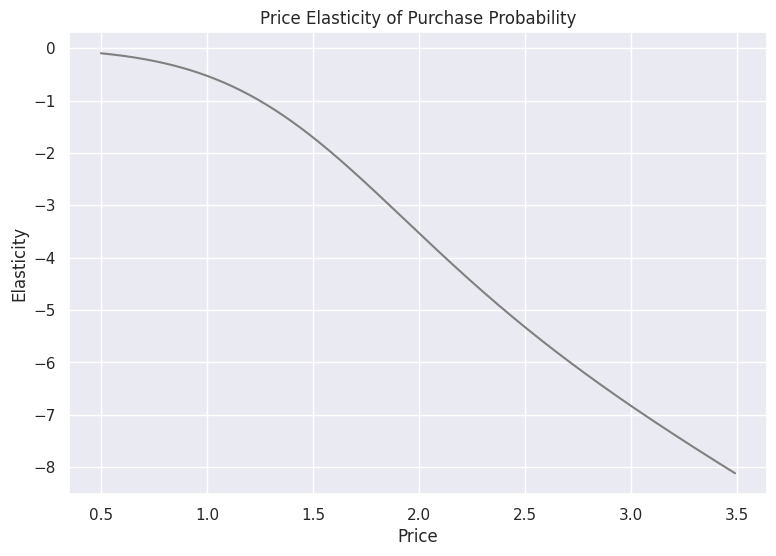

In [15]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

Purchase probability by segment

Segment 1: Career-focused

In [16]:
df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]

In [17]:
Y = df_pa_segment_1['Incidence']

In [18]:
X = pd.DataFrame()

In [19]:
X['Mean_Price'] = (df_pa_segment_1['Price_1'] +
                   df_pa_segment_1['Price_2'] +
                   df_pa_segment_1['Price_3'] +
                   df_pa_segment_1['Price_4'] +
                   df_pa_segment_1['Price_5']) / 5

In [20]:
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(solver='sag')

In [21]:
model_incidence_segment_1.coef_

array([[-1.71205537]])

In [22]:
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [23]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

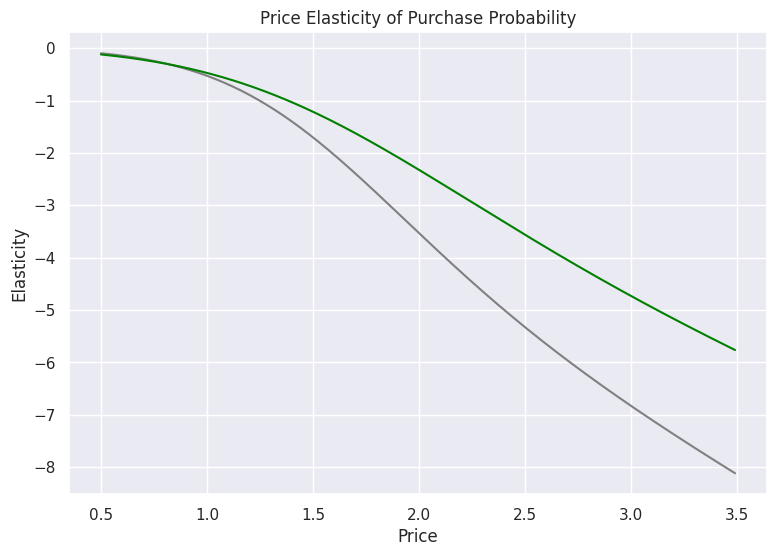

In [24]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

Segment 2: Fewer opportunities

In [25]:
df_pa_segment_2 = df_pa[df_pa['Segment'] == 2]

In [26]:
Y = df_pa_segment_2['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_2['Price_1'] +
                   df_pa_segment_2['Price_2'] +
                   df_pa_segment_2['Price_3'] +
                   df_pa_segment_2['Price_4'] +
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment2 = LogisticRegression(solver = 'sag')
model_incidence_segment2.fit(X, Y)

model_incidence_segment2.coef_
Y_segment_2 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment2 = Y_segment_2[:][: , 1]
pe_segment2 = model_incidence_segment2.coef_[:,0] * price_range * ( 1- purchase_pr_segment2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [27]:
df_price_elasticities['PE_Segment_2'] = pe_segment2

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

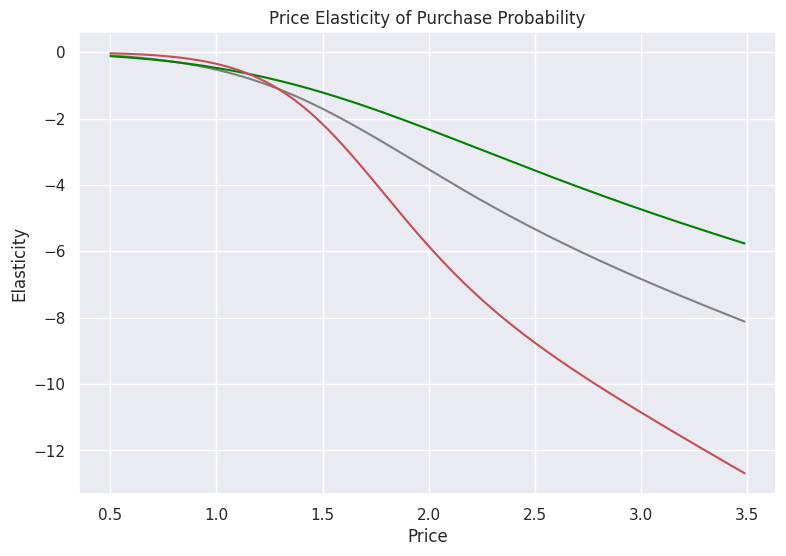

In [28]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

Segment 0: Standard

In [29]:
df_pa_segment_0 = df_pa[df_pa['Segment'] == 0]

Y = df_pa_segment_0['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_0['Price_1'] +
                   df_pa_segment_0['Price_2'] +
                   df_pa_segment_0['Price_3'] +
                   df_pa_segment_0['Price_4'] +
                   df_pa_segment_0['Price_5']) / 5

model_incidence_segment0 = LogisticRegression(solver = 'sag')
model_incidence_segment0.fit(X, Y)

model_incidence_segment0.coef_
Y_segment_0 = model_incidence_segment0.predict_proba(df_price_range)
purchase_pr_segment0 = Y_segment_0[:][: , 1]
pe_segment0 = model_incidence_segment0.coef_[:,0] * price_range *( 1- purchase_pr_segment0)
df_price_elasticities.insert(2, column = 'PE_Segment_0', value = pe_segment0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

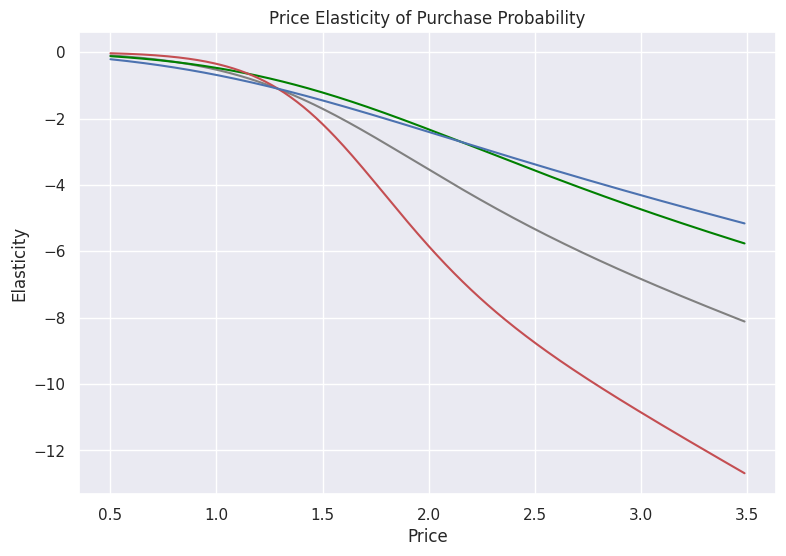

In [35]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.plot(price_range, pe_segment0, color = 'b')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

Segment 3: Well-off

In [33]:
df_pa_segment_3 = df_pa[df_pa['Segment'] == 3]

Y = df_pa_segment_3['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_3['Price_1'] +
                   df_pa_segment_3['Price_2'] +
                   df_pa_segment_3['Price_3'] +
                   df_pa_segment_3['Price_4'] +
                   df_pa_segment_3['Price_5']) / 5

model_incidence_segment3 = LogisticRegression(solver = 'sag')
model_incidence_segment3.fit(X, Y)

model_incidence_segment3.coef_
Y_segment_3 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment3 = Y_segment_3[:][: , 1]
pe_segment3 = model_incidence_segment3.coef_[:,0] * price_range *( 1- purchase_pr_segment3)
df_price_elasticities['PE_Segment_3'] = pe_segment3
df_price_elasticities

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3
0,0.50,-0.096395,-0.211074,-0.119208,-0.030884,-0.010572
1,0.51,-0.100464,-0.217665,-0.123395,-0.032648,-0.011176
2,0.52,-0.104659,-0.224366,-0.127675,-0.034500,-0.011810
3,0.53,-0.108984,-0.231175,-0.132051,-0.036442,-0.012475
4,0.54,-0.113443,-0.238096,-0.136522,-0.038479,-0.013172
5,0.55,-0.118039,-0.245128,-0.141092,-0.040614,-0.013903
6,0.56,-0.122774,-0.252272,-0.145761,-0.042853,-0.014670
7,0.57,-0.127653,-0.259530,-0.150530,-0.045200,-0.015473
8,0.58,-0.132678,-0.266900,-0.155402,-0.047659,-0.016315
9,0.59,-0.137854,-0.274386,-0.160378,-0.050236,-0.017197


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

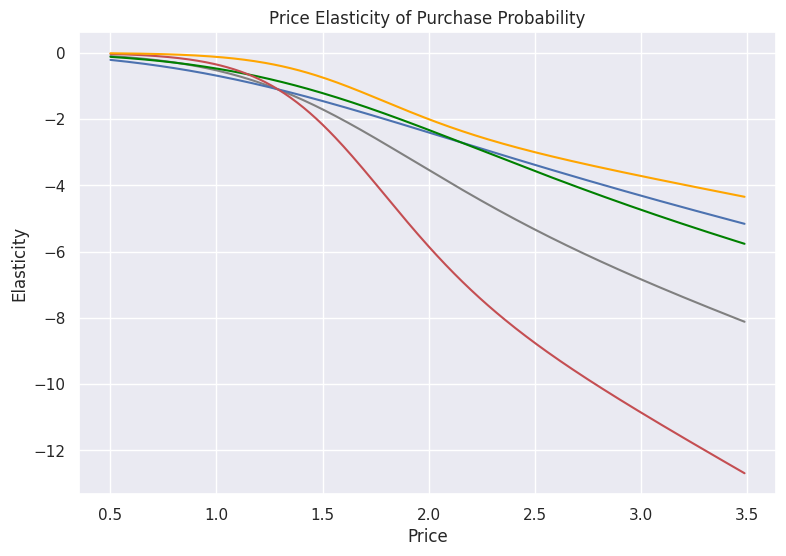

In [34]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment0, color = 'b')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.plot(price_range, pe_segment3, color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

Purchase probability with promotion feature

Data preparation

In [36]:
Y = df_pa['Incidence']

In [51]:
X = pd.DataFrame()
X['Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5']) / 5

In [53]:
X['Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5
X.head()

,Price,Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


Model estimation

In [55]:
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_

array([[-1.49402862,  0.56152902]])

Price elasticity with promotion

In [58]:
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Price"})

In [62]:
df_price_elasticity_promotion['Promotion'] = 1

In [63]:
df_price_elasticity_promotion.head()

,Price,Promotion
0,0.50,1
1,0.51,1
2,0.52,1
3,0.53,1
4,0.54,1


In [64]:
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

In [65]:
promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [66]:
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1
0,0.50,-0.096395,-0.211074,-0.119208,-0.030884,-0.010572,-0.125715
1,0.51,-0.100464,-0.217665,-0.123395,-0.032648,-0.011176,-0.129831
2,0.52,-0.104659,-0.224366,-0.127675,-0.034500,-0.011810,-0.134026
3,0.53,-0.108984,-0.231175,-0.132051,-0.036442,-0.012475,-0.138300
4,0.54,-0.113443,-0.238096,-0.136522,-0.038479,-0.013172,-0.142656
5,0.55,-0.118039,-0.245128,-0.141092,-0.040614,-0.013903,-0.147093
6,0.56,-0.122774,-0.252272,-0.145761,-0.042853,-0.014670,-0.151613
7,0.57,-0.127653,-0.259530,-0.150530,-0.045200,-0.015473,-0.156217
8,0.58,-0.132678,-0.266900,-0.155402,-0.047659,-0.016315,-0.160906
9,0.59,-0.137854,-0.274386,-0.160378,-0.050236,-0.017197,-0.165681


Price elasticity without promotion

In [67]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price"})

In [68]:
df_price_elasticity_promotion_no['Promotion'] = 0

In [69]:
Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)

In [70]:
no_promo = Y_no_promo[: , 1]

In [71]:
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)

In [72]:
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

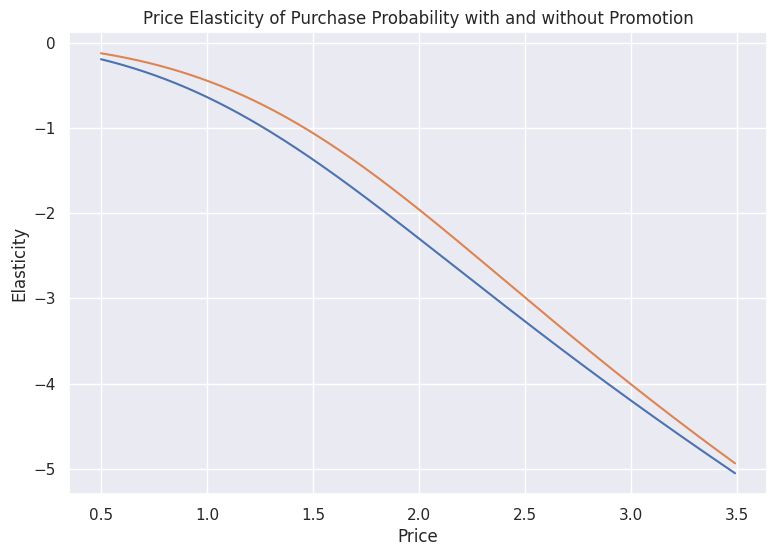

In [73]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')